In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras import layers
from keras import models




In [3]:
from pandas.core.frame import DataFrame
CLASSES = ['apple','banana','orange']
NUM_CLASSES = len(CLASSES)
# siniflari kodlayip output olarak ayarlayalim
one_hot_encoded = np.eye(NUM_CLASSES)
# input ve output arraylerini olusturalim
inputs = []
outputs = []


# 3 csv dosyasini da okuyalim
for i in range(NUM_CLASSES): #buradaki for dongusu her num_class ornegin 0. sınıf icin yani apple class'i icin
  fruit_samples = CLASSES[i]
  data= pd.read_csv("/content/"+fruit_samples+".csv")   # len(data) aliyor yani apple.csv deki satir sayisi kadar oluyor.
  output = one_hot_encoded[i]
  
  for cls_len in range(len(data)):
    input_tensor = []
    
    input_tensor += [(data['Red'][cls_len]),
                      (data['Green'][cls_len]),
                       (data['Blue'][cls_len])]
          
      
    
    inputs.append(input_tensor)
    outputs.append(output)
   
#
inputs = np.array(inputs)
outputs = np.array(outputs)
# bu metod daha az hafıza kullanıyor.
rows = len(inputs) 
random_range = np.arange(rows)
np.random.shuffle(random_range)
# 
inputs = inputs[random_range]
outputs = outputs[random_range]
#
input_train, input_test, input_validation = np.split(inputs,[int(0.6*len(inputs)),int(0.8*len(inputs))])
output_train, output_test, output_validation = np.split(outputs,[int(0.6*len(outputs)),int(0.8*len(outputs))])

print(len(input_train))
print(len(input_test))
print(len(input_validation))

153
51
52


In [6]:
#şimdi de modelimizi oluşturuyoruz
model = models.Sequential()
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(35,activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(12,activation='relu'))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
#
model.compile(optimizer='rmsprop', loss ='mae',metrics=['acc'])
history = model.fit(input_train,output_train,
                    epochs = 80,
                    batch_size = 600,
                    validation_data =(input_validation,output_validation)
                    )


Epoch 1/80
1/1 [==============================] - 1s 1s/step - loss: 0.4438 - acc: 0.4052 - val_loss: 0.4434 - val_acc: 0.4038
Epoch 2/80
1/1 [==============================] - 0s 37ms/step - loss: 0.4436 - acc: 0.3856 - val_loss: 0.4429 - val_acc: 0.4038
Epoch 3/80
1/1 [==============================] - 0s 35ms/step - loss: 0.4428 - acc: 0.3856 - val_loss: 0.4415 - val_acc: 0.4038
Epoch 4/80
1/1 [==============================] - 0s 33ms/step - loss: 0.4418 - acc: 0.3922 - val_loss: 0.4398 - val_acc: 0.4038
Epoch 5/80
1/1 [==============================] - 0s 58ms/step - loss: 0.4413 - acc: 0.4248 - val_loss: 0.4387 - val_acc: 0.4038
Epoch 6/80
1/1 [==============================] - 0s 73ms/step - loss: 0.4406 - acc: 0.4118 - val_loss: 0.4374 - val_acc: 0.4038
Epoch 7/80
1/1 [==============================] - 0s 57ms/step - loss: 0.4388 - acc: 0.4118 - val_loss: 0.4362 - val_acc: 0.4038
Epoch 8/80
1/1 [==============================] - 0s 48ms/step - loss: 0.4389 - acc: 0.3987 - val_l

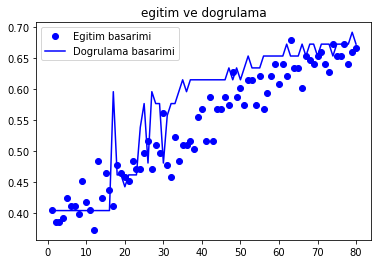

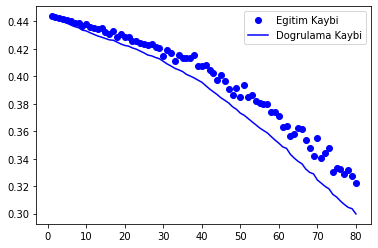

<Figure size 432x288 with 0 Axes>

In [7]:
accuracy = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'bo',label='Egitim basarimi')
plt.plot(epochs,val_acc,'b',label='Dogrulama basarimi')
plt.title('egitim ve dogrulama')
plt.legend()
plt.figure()
#
plt.plot(epochs,loss,'bo',label='Egitim Kaybi ')
plt.plot(epochs,val_loss,'b',label='Dogrulama Kaybi')
plt.legend()
plt.figure()

plt.show()
